We import the necessary libraries:

In [27]:
import numpy as np
import pickle
import os

from double_oracle import *
from examples_simple import *
from examples_blotto import *
from plots import *

# 1 Test game

We run a simple example with the utility function
$$
u(x,y)=(x^3y^2-1)\sin(x+y)
$$
on domain $X=Y=[0,1]$. To do so, we create $X$ and $Y$ as hyperblocks (hypercubes), then define the game and solve with $100$ maximal iterations. Finally, we remove the strategies with low probabilities.

In [22]:
u = lambda x, y: (x**3*y**2-1) * np.sin(x+y)

X = HyperBlock( np.array([[0.,1.]]) )
Y = HyperBlock( np.array([[0.,1.]]) )

game = Game(X, Y, u, init_type="bounds")

xs, p, ys, q, lower_bounds, upper_bounds = double_oracle(game, 100)
xs, p, ys, q = reduce_strategies(xs, p, ys, q)

Iter = 0 Upper - lower estimate = 0.1933690827022443
Iter = 1 Upper - lower estimate = 0.0359919409836279
Iter = 2 Upper - lower estimate = 0.010338388961574019
Iter = 3 Upper - lower estimate = 0.0024044194942806074
Iter = 4 Upper - lower estimate = 0.0006220610300777807
Iter = 5 Upper - lower estimate = 0.0001529171171436028
Iter = 6 Upper - lower estimate = 3.849800496291689e-05
Iter = 7 Upper - lower estimate = 9.564760490743396e-06
Iter = 8 Upper - lower estimate = 2.336649807643809e-06
Iter = 9 Upper - lower estimate = 5.818253766554093e-07


We print the strategies and see that even though the double oracle run for 10 iterations, there are only two strategies played. This suggests that some removal of strategies with low probabilities during the run of the double oracle algorithm could be useful.

In [55]:
def print_probabilities(xs, p, player='a'):
    n_dig = 3
    for i in range(len(p)):
        if len(xs[i]) == 1:
            x = xs[i][0]
        else:
            x = xs[i]
        x = np.round(x, n_dig)
        if player == 'a':
            print("x = " + str(x) + " with p = " + str(np.round(p[i], n_dig)))
        else:
            print("y = " + str(x) + " with q = " + str(np.round(p[i], n_dig)))
        
print_probabilities(xs, p, player='a')
print_probabilities(ys, q, player='b')

x = 1.0 with p = 0.381
x = 0.0 with p = 0.619
y = 0.636 with q = 0.958
y = 0.635 with q = 0.042


Finally, we print the evolution of the lower and upper estimates on the value of the game. We can see that the value of the game is approximately $-0.59$.

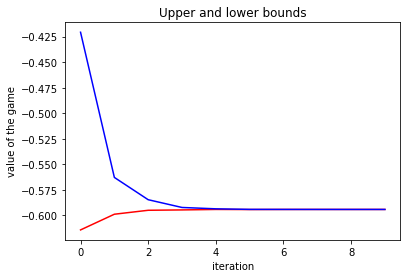

In [28]:
plot_value_evolution(game, lower_bounds, upper_bounds)

# 2 Colonel Blotto game

Even though the convergence of the previous game is nice, the game is simple. The double oracle suffers from the disadvantage that it needs to find a $\textit{global}$ best response in every iteration. For the previous game, we employes the fact that the strategical spaces are one-dimensional, discretized the space and found the global best response. However, this is not possible in general, unless some structure (such as convexity) is present.

The next game present a continuous variant of the Colonel Blotto game. Each player needs to distribute its armies to $n$ battlefields such that the payoff on battlefield $i$ is based on its payoff $a_i$ and the difference of the allocated armies of both players $x_i-y_i$. The parameter $c$ denotes the "level of continuity". This game is a non-trivial due to the need to consider binary variables. However, it is possible to find best responses based on solving a mixed-integer linear problem. For more information, see the enclosed paper.

We define a game with $n=3$ battlefields with uniform yields $a$. Since the players need to distribute their armies, the strategy space is a probability block (simplex). We run the game as in the previous case.

In [65]:
n = 3        
a = np.ones(n)
c = 1/4

X = ProbBlock(n)
Y = ProbBlock(n)

game = Blotto(X, Y, a, c, init_type="bounds")
        
xs, p, ys, q, lower_bounds, upper_bounds = double_oracle(game, 100)
xs, p, ys, q = reduce_strategies(xs, p, ys, q)

Iter = 0 Upper - lower estimate = 2.0
Iter = 1 Upper - lower estimate = 2.0000000050000017
Iter = 2 Upper - lower estimate = 1.6141654968998762
Iter = 3 Upper - lower estimate = 1.2832834160829836
Iter = 4 Upper - lower estimate = 1.3108565968970178
Iter = 5 Upper - lower estimate = 1.180963282220147
Iter = 6 Upper - lower estimate = 0.4703260955679638
Iter = 7 Upper - lower estimate = 0.5859134938053026
Iter = 8 Upper - lower estimate = 1.5765166949677223e-13


We plot the optimal distributions. It reduces the probability simplex from three dimensions to two dimensions.

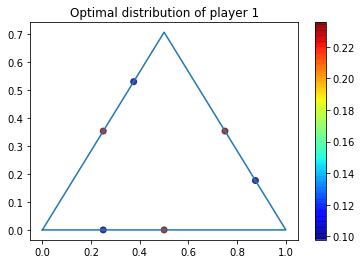

In [69]:
plot_blotto(game, xs, p, 1)

Since running the Colonel Blotto game for a smaller $c$ takes some time, we load the results and plot again the optimal distribution of the first player. We see that it is symmetric and forms a nice pattern.

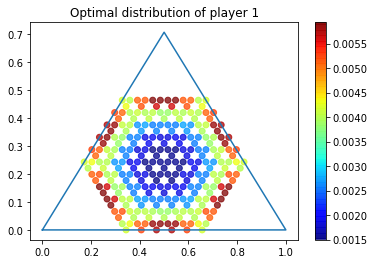

In [72]:
file_name = os.path.join("Results", "Blotto_3_0.03125_uniform_equal.pkl")

with open(file_name, 'rb') as f:
    game, xs, p, ys, q, xs_full, p_full, ys_full, q_full, lower_bounds, upper_bounds = pickle.load(f)
    
plot_blotto(game, xs, p, 1)